In [84]:
import pandas as pd
import pandas_datareader as pdr
import plotly.graph_objects as go
import numpy as np
import dbf
from simpledbf import Dbf5
import plotly.express as px

In [85]:
mar_14 = Dbf5('../data/data mariages 2014.dbf').to_dataframe()

#mar_15 = Dbf5('../data/data mariages 2015.dbf').to_dataframe()

#mar_16  = Dbf5('../data/data mariages 2016.dbf').to_dataframe()

#mar_17 = Dbf5('../data/data mariages 2017.dbf').to_dataframe()

#mar_18 = Dbf5('../data/data mariages 2018.dbf').to_dataframe()

#mar_19 = Dbf5('../data/data mariages 2019.dbf').to_dataframe()

#mar_20 = Dbf5('../data/data mariages 2020.dbf').to_dataframe()

In [86]:
def filter_df(df):
    df.drop(columns = ['ANAIS1', 'DEPNAIS1', 'INDNAT1', 'ETAMAT1', 'ANAIS2', 'DEPNAIS2', 'INDNAT2','ETAMAT2', 'JSEMAINE', 'DEPDOM', 'TUDOM', 'TUCOM', 'NBENFCOM'], axis=1, inplace=True)

In [87]:
#df = pd.concat([mar_14, mar_15, mar_16, mar_17, mar_18, mar_19, mar_20])
#filter_df(df)

filter_df(mar_14)
#mar_14 = mar_14.sort_values(by=['MMAR'])
df = mar_14
df = df.loc[df['DEPMAR'] == '01']
df

,SEXE1,SEXE2,AMAR,MMAR,DEPMAR
0,F,M,2014,02,01
1,M,F,2014,08,01
2,M,F,2014,08,01
3,M,F,2014,08,01
4,M,F,2014,05,01
...,...,...,...,...,...
225570,M,F,2014,07,01
233183,M,F,2014,10,01
233901,M,F,2014,10,01
234592,M,F,2014,06,01


In [88]:
df = df.drop('DEPMAR', axis=1)
df

,SEXE1,SEXE2,AMAR,MMAR
0,F,M,2014,02
1,M,F,2014,08
2,M,F,2014,08
3,M,F,2014,08
4,M,F,2014,05
...,...,...,...,...
225570,M,F,2014,07
233183,M,F,2014,10
233901,M,F,2014,10
234592,M,F,2014,06


In [89]:
HH = df[(df['SEXE1'] == 'M') & (df['SEXE2'] == 'M')]
graph = pd.DataFrame(HH.groupby('MMAR').size(), columns = ['HH'])

FF = df[(df['SEXE1'] == 'F') & (df['SEXE2'] == 'F')]
graph = graph.assign(FF = FF.groupby('MMAR').size())

HF = df[((df['SEXE1'] == 'M') & (df['SEXE2'] == 'F')) | ((df['SEXE1'] == 'F') & (df['SEXE2'] == 'M'))]
graph = graph.assign(HF = HF.groupby('MMAR').size())

graph = graph.assign(TOTAL = df.groupby('MMAR').size().astype(int))

graph

,HH,FF,HF,TOTAL
MMAR,,,,
02,2,1,61,64
03,5,6,132,143
05,2,6,234,242
06,4,6,354,364
07,6,7,367,380
08,6,8,342,356
09,2,3,272,277
10,3,1,138,142
11,5,1,76,82


In [90]:
col = graph.iloc[:, graph.columns.get_level_values(0)=='MMAR']
check = []
for x in col.itertuples():
    check.append(x.Index)

for i in range(1, 13):
    if i < 10:
        s = "0" + str(i)
    else:
        s = str(i)
    if s not in check :
        graph.loc[s,:] = (0,0,0, 0)
      
graph

,HH,FF,HF,TOTAL
MMAR,,,,
02,2.0,1.0,61.0,64.0
03,5.0,6.0,132.0,143.0
05,2.0,6.0,234.0,242.0
06,4.0,6.0,354.0,364.0
07,6.0,7.0,367.0,380.0
08,6.0,8.0,342.0,356.0
09,2.0,3.0,272.0,277.0
10,3.0,1.0,138.0,142.0
11,5.0,1.0,76.0,82.0


In [94]:
graph = graph.sort_index(level=0)
graph = graph.reset_index()
graph

,MMAR,HH,FF,HF,TOTAL
0,01,0.0,0.0,0.0,0.0
1,02,2.0,1.0,61.0,64.0
2,03,5.0,6.0,132.0,143.0
3,04,0.0,0.0,0.0,0.0
4,05,2.0,6.0,234.0,242.0
5,06,4.0,6.0,354.0,364.0
6,07,6.0,7.0,367.0,380.0
7,08,6.0,8.0,342.0,356.0
8,09,2.0,3.0,272.0,277.0
9,10,3.0,1.0,138.0,142.0


In [95]:
fig = px.histogram(graph, x = 'MMAR', y = ['HH', 'FF', 'HF', 'TOTAL'])
fig.show()

In [96]:
fig = px.histogram(graph, x = 'MMAR', y = 'TOTAL')
fig.show()

In [120]:
fig = px.histogram(graph, x = 'MMAR', y = ['HH', 'FF', 'HF'])
fig.show()

<AxesSubplot:>

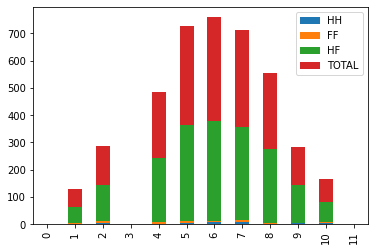

In [97]:
graph.plot.bar(stacked=True)

In [117]:
#mar_14['Mariage'] = mar_14['SEXE1'] + mar_14['SEXE2']
#mar = mar_14.drop(['AMAR', 'SEXE1', 'SEXE2'], axis=1)

#def str_update(s):
 #   if s == 'FM':
  #      return 'MF'
   # return s

#L = ['janv', 'fev', 'mars', 'avril', 'mai', 'juin', 'juillet', 'aout', 'sept', 'oct','nov','dec']
#def update_month(s):
 #   if s not in L:
  #      return L[int(s) - 1]
   # return s

#mar['Mariage'] =  mar['Mariage'].apply(str_update)
#mar['MMAR'] =  mar['MMAR'].apply(update_month)

#mar

,MMAR,DEPMAR,Mariage
0,fev,01,MF
1,aout,01,MF
2,aout,01,MF
3,aout,01,MF
4,mai,01,MF
...,...,...,...
241479,dec,84,MF
241480,juillet,85,MF
241481,mai,47,MF
241482,juin,47,MF


In [118]:
#mar = mar.loc[mar['DEPMAR'] == '01']
#mar = mar.drop('DEPMAR', axis=1)

#mar


,MMAR,Mariage
0,fev,MF
1,aout,MF
2,aout,MF
3,aout,MF
4,mai,MF
...,...,...
225570,juillet,MF
233183,oct,MF
233901,oct,MF
234592,juin,MF


In [119]:
#mar = mar.groupby('MMAR').mean()
#mar






,0,1
0,aout,MMAR Mariage 1 aout MF 2 ...
1,avril,MMAR Mariage 23 avril MF 26...
2,dec,MMAR Mariage 13 dec MF 2646 ...
3,fev,MMAR Mariage 0 fev MF 9 ...
4,janv,MMAR Mariage 11 janv MF 2595...
5,juillet,MMAR Mariage 7 juillet M...
6,juin,MMAR Mariage 5 juin MF 8 ...
7,mai,MMAR Mariage 4 mai MF 17 ...
8,mars,MMAR Mariage 2592 mars MF 2605...
9,nov,MMAR Mariage 2710 nov MF 2711 ...


In [ ]:
L = ['janv', 'fev', 'mars', 'avril', 'mai', 'juin', 'juillet', 'aout', 'sept', 'oct','nov','dec']
def update_month(s):
    if s not in L:
        return L[int(s) - 1]
    return s

graph['MMAR'] =  graph['MMAR'].apply(update_month)
graph

In [ ]:
#fig = px.bar(mar, x="MMAR", y="Mariage", title="Bla")
#

In [109]:
fig.show()